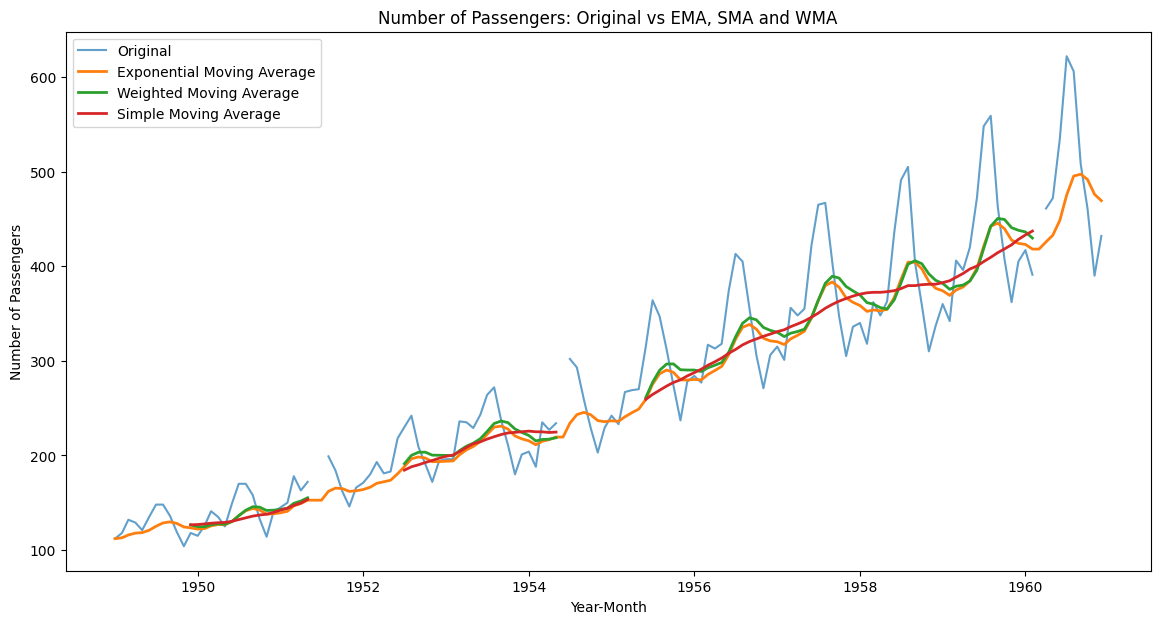

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

csv_file = '/content/sample_data/passengers.csv'

df = pd.read_csv(csv_file, names=['Year-Month', 'Number of Passengers'])

df['Year-Month'] = pd.to_datetime(df['Year-Month'], format='%Y-%m')

df['EMA'] = df['Number of Passengers'].ewm(span=12, adjust=False).mean()

weights = np.arange(1, 13)  # This creates an array of weights [1, 2, ..., 12]
df['WMA'] = df['Number of Passengers'].rolling(window=12).apply(lambda x: np.dot(x, weights)/weights.sum(), raw=True)

# Adding Simple Moving Average (SMA)
df['SMA'] = df['Number of Passengers'].rolling(window=12).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Year-Month'], df['Number of Passengers'], label='Original', alpha=0.7)
plt.plot(df['Year-Month'], df['EMA'], label='Exponential Moving Average', linewidth=2)
plt.plot(df['Year-Month'], df['WMA'], label='Weighted Moving Average', linewidth=2)
plt.plot(df['Year-Month'], df['SMA'], label='Simple Moving Average', linewidth=2)
plt.title('Number of Passengers: Original vs EMA, SMA and WMA')
plt.xlabel('Year-Month')
plt.ylabel('Number of Passengers')
plt.legend()

plt.savefig('passengers_plot.png', format='png')

plt.show()
